In [20]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb
from home_equity import *
import os

In [23]:
out_dir = "/home/ethan/Documents/Projects/House/Analyses"

In [2]:
d_home_val = 1000
d_mortgage_pmt = 2000
d_int_pmt = d_mortgage_pmt * 0.5
d_princ_pmt = d_mortgage_pmt - d_int_pmt
d_hoa = 400
d_prop_tax = 500
d_inc = 10000
d_inc_tax = he.calc_d_inc_tax(d_inc, d_int_pmt, annual_periods=12)
d_repairs = 200

In [1]:
from home_equity import *

In [17]:
# current rent cost, no home purchase
rent_inputs1 = {'home_price': 0.01, 
                  'down_pmt_pct': 20, 
                  'int_rate': 0.025, 
                  'mortgage_yrs': 15, 
                  'monthly_rent': 2200, 
                  'initial_total_income': 125000, 
                  'JointFile': False, 
                  'monthly_hoa': 0, 
                  'prop_tax_rate': 0, 
                  'house_apprecation_rate': 0, 
                  'stock_appreciation_rate': 0.03, 
                  'home_repair_rate': 0, 
                  'initial_home_asset': 0, 
                  'initial_home_debt': 0, 
                  'initial_savings': 150000}

# no rent, housing market and stock gains are equal
buy_inputs1 = {'home_price': 600000, 
              'down_pmt_pct': 20, 
              'int_rate': 0.025, 
              'mortgage_yrs': 15, 
              'monthly_rent': 0, 
              'initial_total_income': 125000, 
              'JointFile': False,  
              'monthly_hoa': 400, 
              'prop_tax_rate': 0.0125, 
              'house_apprecation_rate': 0.03, 
              'stock_appreciation_rate': 0.03, 
              'home_repair_rate': 0.01, 
              'initial_home_asset': 0, 
              'initial_home_debt': 0, 
              'initial_savings': 150000}

# no rent, stock gains are leveraged
buy_inputs2 = {'home_price': 600000, 
              'down_pmt_pct': 20, 
              'int_rate': 0.025, 
              'mortgage_yrs': 15, 
              'monthly_rent': 0, 
              'initial_total_income': 125000, 
              'JointFile': False, 
              'monthly_hoa': 400, 
              'prop_tax_rate': 0.0125, 
              'house_apprecation_rate': 0.03, 
              'stock_appreciation_rate': 0.15, 
              'home_repair_rate': 0.01, 
              'initial_home_asset': 0, 
              'initial_home_debt': 0, 
              'initial_savings': 150000}

In [19]:
income=simple_job_arr(initial_salary=125000, annual_raise=0.03, num_periods=180)
buy_df = buy_home_df(income, **buy_inputs1)
rent_df = buy_home_df(income, **rent_inputs1)
compare_housing(rent_df, "Rent", buy_df, "Buy")

Year 1
Wealth difference (Buy - Rent)
13911.18

Year 2
Wealth difference (Buy - Rent)
28607.41

Year 5
Wealth difference (Buy - Rent)
69435.39

Year 10
Wealth difference (Buy - Rent)
124873.99



In [20]:
income=simple_job_arr(initial_salary=125000, annual_raise=0.03, num_periods=180)
buy_df = buy_home_df(income, **buy_inputs2)
rent_df = buy_home_df(income, **rent_inputs1)
compare_housing(rent_df, "Rent", buy_df, "Buy")

Year 1
Wealth difference (Buy - Rent)
2617.81

Year 2
Wealth difference (Buy - Rent)
6342.15

Year 5
Wealth difference (Buy - Rent)
29039.87

Year 10
Wealth difference (Buy - Rent)
164250.62



Mortgage Summary
    Home price: $600000.00
    Down payment: $120000.00 (20%)
    Loan amount: $480000.00
    Interest rate: 3.00%
    Mortgage years: 15
    Monthy payment: $3314.79
    Total interest payable: $116662.54
    Interest to loan ratio: 0.24

Year 1
Wealth difference (Buy - Rent)
21084.25

Year 2
Wealth difference (Buy - Rent)
44042.20

Year 5
Wealth difference (Buy - Rent)
113207.15

Year 10
Wealth difference (Buy - Rent)
233849.84



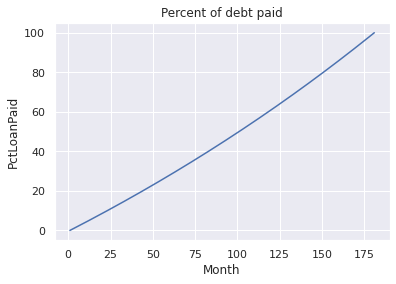

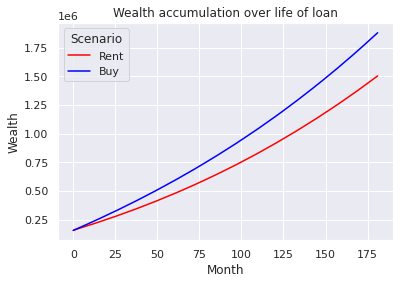

In [107]:
# current rent cost, no home purchase
rent_inputs = {'home_price': 0.01, 
                  'down_pmt_pct': 20, 
                  'int_rate': 0.025, 
                  'mortgage_yrs': 15, 
                  'monthly_rent': 2134, 
                  'initial_total_income': 125000, 
                  'JointFile': False, 
                  'monthly_hoa': 0, 
                  'prop_tax_rate': 0, 
                  'house_apprecation_rate': 0, 
                  'stock_appreciation_rate': 0.03, 
                  'home_repair_rate': 0, 
                  'initial_home_asset': 0, 
                  'initial_home_debt': 0, 
                  'initial_savings': 150000}

# no rent, buy a condo, housing market and stock gains are equal
buy_inputs = {'home_price': 600000, 
              'down_pmt_pct': 20, 
              'int_rate': 0.03, 
              'mortgage_yrs': 15, 
              'monthly_rent': 0, 
              'initial_total_income': 125000, 
              'JointFile': False,  
              'monthly_hoa': 400, 
              'prop_tax_rate': 0.0125, 
              'house_apprecation_rate': 0.05, 
              'stock_appreciation_rate': 0.05, 
              'home_repair_rate': 0.01, 
              'initial_home_asset': 0, 
              'initial_home_debt': 0, 
              'initial_savings': 150000}
income=simple_job_arr(initial_salary=125000, annual_raise=0.03, num_periods=180)
buy_df = buy_home_df(income, **buy_inputs)
rent_df = buy_home_df(income, **rent_inputs)
buy_df = buy_df.assign(Scenario='Buy')
rent_df = rent_df.assign(Scenario='Rent')

# Mortgage summary
down_pmt = buy_inputs['down_pmt_pct'] / 100 * buy_inputs['home_price']
mortgage_summary(buy_inputs['home_price'], buy_inputs['int_rate'], buy_inputs['mortgage_yrs'], down_pmt)
print()

# Compare rent vs buy wealth                                          
compare_housing(rent_df, "Rent", buy_df, "Buy")

# Debt figure
f1 = sb.lineplot(data=buy_df.drop([0]), x='Month', y='PctLoanPaid', markers=True)
f1.set_title("Percent of debt paid")
plt.show()

# Wealth comparison figure
rentbuy_df = pd.concat([rent_df, buy_df]).reset_index()
f2 = sb.lineplot(data=rentbuy_df, x='Month', y='Wealth', hue='Scenario', palette=['red', 'blue'])
f2.set_title("Wealth accumulation over life of loan")
#plt.show()

Mortgage Summary
    Home price: $700000.00
    Down payment: $140000.00 (20%)
    Loan amount: $560000.00
    Interest rate: 3.00%
    Mortgage years: 15
    Monthy payment: $3867.26
    Total interest payable: $136106.29
    Interest to loan ratio: 0.24

Year 1
Wealth difference (Buy - Rent)
5225.46

Year 2
Wealth difference (Buy - Rent)
11444.39

Year 5
Wealth difference (Buy - Rent)
33511.25

Year 10
Wealth difference (Buy - Rent)
82736.46



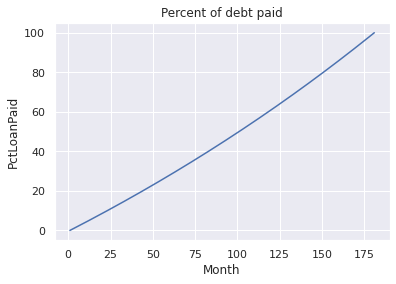

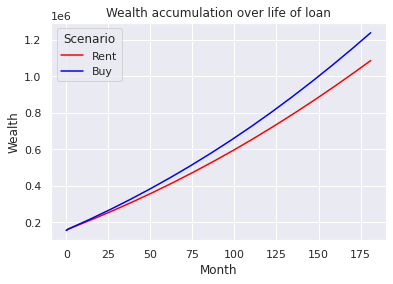

In [122]:
#Inputs
home_price = 700000  # buy only
down_pmt_pct = 20  # buy only
int_rate = 0.03
mortgage_yrs = 15
monthly_rent = 3000  # rent only (current rent = 2134)
initial_total_income = 125000
JointFile = False
monthly_hoa = 400  # buy only
prop_tax_rate = 0.0125
house_apprecation_rate = 0.0
stock_appreciation_rate = 0.0
home_repair_rate = 0.01
initial_home_asset = 0
initial_home_debt = 0
initial_savings = 150000

# current rent cost, no home purchase
rent_inputs = {'home_price': 0.01, 
                  'down_pmt_pct': 0, 
                  'int_rate': int_rate, 
                  'mortgage_yrs': mortgage_yrs, 
                  'monthly_rent': monthly_rent, 
                  'initial_total_income': initial_total_income, 
                  'JointFile': JointFile, 
                  'monthly_hoa': 0, 
                  'prop_tax_rate': 0, 
                  'house_apprecation_rate': 0, 
                  'stock_appreciation_rate': stock_appreciation_rate, 
                  'home_repair_rate': 0, 
                  'initial_home_asset': 0, 
                  'initial_home_debt': 0, 
                  'initial_savings': initial_savings}

# no rent, buy a condo, housing market and stock gains are equal
buy_inputs = {'home_price': home_price, 
              'down_pmt_pct': down_pmt_pct, 
              'int_rate': int_rate, 
              'mortgage_yrs': mortgage_yrs, 
              'monthly_rent': 0, 
              'initial_total_income': initial_total_income, 
              'JointFile': JointFile,  
              'monthly_hoa': monthly_hoa, 
              'prop_tax_rate': prop_tax_rate, 
              'house_apprecation_rate': house_apprecation_rate, 
              'stock_appreciation_rate': stock_appreciation_rate, 
              'home_repair_rate': home_repair_rate, 
              'initial_home_asset': initial_home_asset, 
              'initial_home_debt': initial_home_debt, 
              'initial_savings': initial_savings}
income=simple_job_arr(initial_salary=125000, annual_raise=0.03, num_periods=mortgage_yrs*12)
buy_df = buy_home_df(income, **buy_inputs)
rent_df = buy_home_df(income, **rent_inputs)
buy_df = buy_df.assign(Scenario='Buy')
rent_df = rent_df.assign(Scenario='Rent')

# Mortgage summary
down_pmt = buy_inputs['down_pmt_pct'] / 100 * buy_inputs['home_price']
mortgage_summary(buy_inputs['home_price'], buy_inputs['int_rate'], buy_inputs['mortgage_yrs'], down_pmt)
print()

# Compare rent vs buy wealth                                          
compare_housing(rent_df, "Rent", buy_df, "Buy")

# Debt figure
f1 = sb.lineplot(data=buy_df.drop([0]), x='Month', y='PctLoanPaid', markers=True)
f1.set_title("Percent of debt paid")
plt.show()

# Wealth comparison figure
rentbuy_df = pd.concat([rent_df, buy_df]).reset_index()
f2 = sb.lineplot(data=rentbuy_df, x='Month', y='Wealth', hue='Scenario', palette=['red', 'blue'])
f2.set_title("Wealth accumulation over life of loan")
plt.show()

Mortgage Summary
    Home price: $700,000
    Down payment: $140,000 (20%)
    Loan amount: $560,000
    Interest rate: 3.00%
    Mortgage years: 15
    Monthy mortgage payment: $3,867
    Total interest payable: $136,106
    Interest to loan ratio: 0.24

Year 1
Wealth difference (Buy - Rent)
30288.43

Year 2
Wealth difference (Buy - Rent)
62275.99

Year 5
Wealth difference (Buy - Rent)
150758.24

Year 10
Wealth difference (Buy - Rent)
267057.04



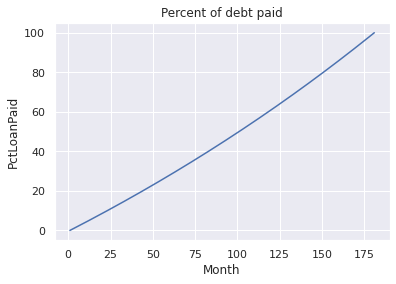

$3,000 monthly rental vs $700,000 purchase


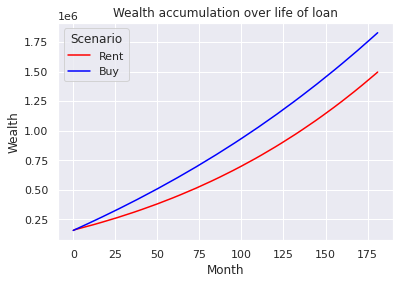

In [6]:
#Inputs
home_price = 700000  # buy only
down_pmt_pct = 20  # buy only
int_rate = 0.03
mortgage_yrs = 15
monthly_rent = 3000  # rent only (current rent = 2134)
initial_total_income = 125000
JointFile = False
monthly_hoa = 400  # buy only
prop_tax_rate = 0.0125
house_apprecation_rate = 0.05
stock_appreciation_rate = 0.05
home_repair_rate = 0.01
initial_home_asset = 0
initial_home_debt = 0
initial_savings = 150000

# Define buy and rent DataFrames
income=simple_job_arr(initial_salary=initial_total_income, annual_raise=0.03, num_periods=mortgage_yrs*12)

buy_df = buy_home_df(income, home_price=home_price, down_pmt_pct=down_pmt_pct, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=0, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=monthly_hoa, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

rent_df = buy_home_df(income, home_price=0.01, down_pmt_pct=0, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=monthly_rent, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=0, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

buy_df = buy_df.assign(Scenario='Buy')
rent_df = rent_df.assign(Scenario='Rent')

# Create mortgage summary
down_pmt = down_pmt_pct / 100 * home_price
mortgage_summary(home_price, int_rate, mortgage_yrs, down_pmt)
print()

# Compare rent vs buy wealth                                          
compare_housing(rent_df, "Rent", buy_df, "Buy")

# Create debt figure
sb.set_theme()
f1 = sb.lineplot(data=buy_df.drop([0]), x='Month', y='PctLoanPaid', markers=True)
f1.set_title("Percent of debt paid")
plt.show()

# Create wealth comparison figure
rentbuy_df = pd.concat([rent_df, buy_df]).reset_index()
f2 = sb.lineplot(data=rentbuy_df, x='Month', y='Wealth', hue='Scenario', palette=['red', 'blue'])
f2.set_title("Wealth accumulation over life of loan")
print('${:,d}'.format(monthly_rent) + " monthly rental vs ${:,d}".format(home_price) + " purchase")
plt.show()

Mortgage Summary
    Home price: $700,000
    Down payment: $140,000 (20%)
    Loan amount: $560,000
    Interest rate: 3.00%
    Mortgage years: 30
    Monthy mortgage payment: $2,361
    Total interest payable: $289,954
    Interest to loan ratio: 0.52

Year 1
Wealth difference (Buy - Rent)
30515.19

Year 2
Wealth difference (Buy - Rent)
63347.36

Year 5
Wealth difference (Buy - Rent)
158614.49

Year 10
Wealth difference (Buy - Rent)
304026.04



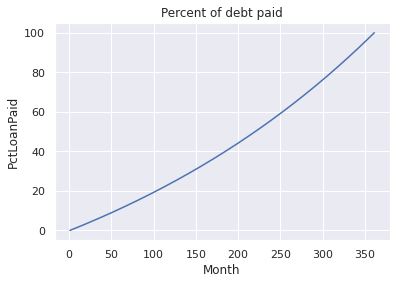

$3,000 monthly rental vs $700,000 purchase


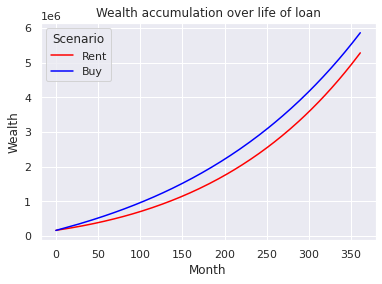

In [4]:
#Inputs
home_price = 700000  # buy only
down_pmt_pct = 20  # buy only
int_rate = 0.03
mortgage_yrs = 30
monthly_rent = 3000  # rent only (current rent = 2134)
initial_total_income = 125000
JointFile = False
monthly_hoa = 400  # buy only
prop_tax_rate = 0.0125
house_apprecation_rate = 0.05
stock_appreciation_rate = 0.05
home_repair_rate = 0.01
initial_home_asset = 0
initial_home_debt = 0
initial_savings = 150000

# Define buy and rent DataFrames
income=simple_job_arr(initial_salary=initial_total_income, annual_raise=0.03, num_periods=mortgage_yrs*12)

buy_df = buy_home_df(income, home_price=home_price, down_pmt_pct=down_pmt_pct, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=0, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=monthly_hoa, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

rent_df = buy_home_df(income, home_price=0.01, down_pmt_pct=0, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=monthly_rent, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=0, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

buy_df = buy_df.assign(Scenario='Buy')
rent_df = rent_df.assign(Scenario='Rent')

# Create mortgage summary
down_pmt = down_pmt_pct / 100 * home_price
mortgage_summary(home_price, int_rate, mortgage_yrs, down_pmt)
print()

# Compare rent vs buy wealth                                          
compare_housing(rent_df, "Rent", buy_df, "Buy")

# Create debt figure
sb.set_theme()
f1 = sb.lineplot(data=buy_df.drop([0]), x='Month', y='PctLoanPaid', markers=True)
f1.set_title("Percent of debt paid")
plt.show()

# Create wealth comparison figure
rentbuy_df = pd.concat([rent_df, buy_df]).reset_index()
f2 = sb.lineplot(data=rentbuy_df, x='Month', y='Wealth', hue='Scenario', palette=['red', 'blue'])
f2.set_title("Wealth accumulation over life of loan")
print('${:,d}'.format(monthly_rent) + " monthly rental vs ${:,d}".format(home_price) + " purchase")
plt.show()

Mortgage Summary
    Home price: $750,000
    Down payment: $150,000 (20%)
    Loan amount: $600,000
    Interest rate: 3.00%
    Mortgage years: 15
    Monthy mortgage payment: $4,143
    Total interest payable: $145,828
    Interest to loan ratio: 0.24

Year 1
Wealth difference (Buy - Rent)
40474.79

Year 2
Wealth difference (Buy - Rent)
83928.25

Year 5
Wealth difference (Buy - Rent)
209189.58

Year 10
Wealth difference (Buy - Rent)
395876.91



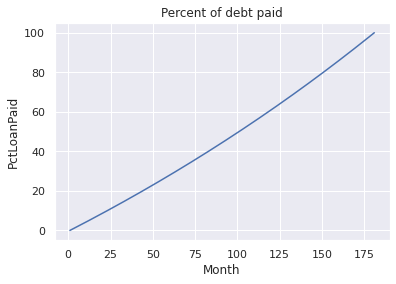

$3,500 monthly rental vs $750,000 purchase


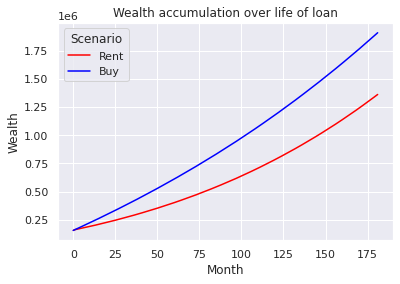

In [24]:
#Inputs
home_price = 750000  # buy only
down_pmt_pct = 20  # buy only
int_rate = 0.03
mortgage_yrs = 15
monthly_rent = 3500  # rent only (current rent = 2134)
initial_total_income = 125000
JointFile = False
monthly_hoa = 0  # buy only
prop_tax_rate = 0.0125
house_apprecation_rate = 0.05
stock_appreciation_rate = 0.05
home_repair_rate = 0.01
initial_home_asset = 0
initial_home_debt = 0
initial_savings = 150000
SAVE_CSV = True

# Define buy and rent DataFrames
income=simple_job_arr(initial_salary=initial_total_income, annual_raise=0.03, num_periods=mortgage_yrs*12)

buy_df = buy_home_df(income, home_price=home_price, down_pmt_pct=down_pmt_pct, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=0, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=monthly_hoa, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

rent_df = buy_home_df(income, home_price=0.01, down_pmt_pct=0, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=monthly_rent, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=0, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

buy_df = buy_df.assign(Scenario='Buy')
rent_df = rent_df.assign(Scenario='Rent')

# Create mortgage summary
down_pmt = down_pmt_pct / 100 * home_price
mortgage_summary(home_price, int_rate, mortgage_yrs, down_pmt)
print()

# Compare rent vs buy wealth                                          
compare_housing(rent_df, "Rent", buy_df, "Buy")

# Create debt figure
sb.set_theme()
f1 = sb.lineplot(data=buy_df.drop([0]), x='Month', y='PctLoanPaid', markers=True)
f1.set_title("Percent of debt paid")
plt.show()

# Create wealth comparison figure
rentbuy_df = pd.concat([rent_df, buy_df]).reset_index()
f2 = sb.lineplot(data=rentbuy_df, x='Month', y='Wealth', hue='Scenario', palette=['red', 'blue'])
f2.set_title("Wealth accumulation over life of loan")
print('${:,d}'.format(monthly_rent) + " monthly rental vs ${:,d}".format(home_price) + " purchase")
plt.show()

# Save DFs to csv
if SAVE_CSV:
    rent_df.to_csv(os.path.join(out_dir, '01', 'rent_df.csv'))
    buy_df.to_csv(os.path.join(out_dir, '01', 'buy_df.csv'))

In [14]:
rent_df

,d_Income,d_IncomeTax,d_HomeAsset,d_Debt,d_PropertyTax,d_PrinciplePmt,d_InterestPmt,d_HOA,d_Repairs,d_Rent,d_StockGains,d_Savings,d_Wealth,HomeAsset,HomeDebt,HomeEquity,PctLoanPaid,Savings,Wealth,Scenario
Month,,,,,,,,,,,,,,,,,,,,
0,10416.666667,3741.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0,0.000000,0,0.000000,6675.666667,6675.666667,0.000000,0.000000e+00,0.000000,100.000000,1.566757e+05,1.566757e+05,Rent
1,10416.666667,3741.000000,0.010000,0.010000,0.00000,0.000000,0.000000e+00,0,0.000000,0,0.000000,6675.666667,6675.666667,0.010000,1.000000e-02,0.000000,0.000000,1.633513e+05,1.633513e+05,Rent
2,10416.666667,3740.999990,0.000042,-0.000044,0.00001,0.000044,2.500000e-05,0,0.000008,3500,55.630556,3231.297145,3231.297230,0.010042,9.955942e-03,0.000086,0.440582,1.665826e+05,1.665826e+05,Rent
3,10416.666667,3740.999990,0.000042,-0.000044,0.00001,0.000044,2.488985e-05,0,0.000008,3500,69.094294,3244.760883,3244.760968,0.010083,9.911774e-03,0.000172,0.882265,1.698274e+05,1.698274e+05,Rent
4,10416.666667,3740.999990,0.000042,-0.000044,0.00001,0.000044,2.477943e-05,0,0.000008,3500,82.614131,3258.280720,3258.280806,0.010125,9.867495e-03,0.000258,1.325052,1.730857e+05,1.730857e+05,Rent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,15756.142967,6083.321886,0.000042,-0.000068,0.00001,0.000068,8.567904e-07,0,0.000008,3500,4817.091112,10989.912105,10989.912215,0.017333,2.745148e-04,0.017059,97.254852,1.317092e+06,1.317092e+06,Rent
178,15756.142967,6083.321887,0.000042,-0.000068,0.00001,0.000068,6.862870e-07,0,0.000008,3500,4862.882412,11035.703405,11035.703515,0.017375,2.061429e-04,0.017169,97.938571,1.328127e+06,1.328127e+06,Rent
179,15756.142967,6083.321887,0.000042,-0.000069,0.00001,0.000069,5.153573e-07,0,0.000008,3500,4908.864510,11081.685503,11081.685613,0.017417,1.376001e-04,0.017279,98.623999,1.339209e+06,1.339209e+06,Rent


In [15]:
buy_df

,d_Income,d_IncomeTax,d_HomeAsset,d_Debt,d_PropertyTax,d_PrinciplePmt,d_InterestPmt,d_HOA,d_Repairs,d_Rent,d_StockGains,d_Savings,d_Wealth,HomeAsset,HomeDebt,HomeEquity,PctLoanPaid,Savings,Wealth,Scenario
Month,,,,,,,,,,,,,,,,,,,,
0,10416.666667,3741.000000,0.0,0.000000,0.00,0.000000,0.000000,0,0.0,0,0.000000,6675.666667,6675.666667,0.0,0.000000e+00,0.000000e+00,100.000000,156675.666667,1.566757e+05,Buy
1,10416.666667,3741.000000,750000.0,600000.000000,0.00,0.000000,0.000000,0,0.0,0,0.000000,-143324.333333,6675.666667,750000.0,6.000000e+05,1.500000e+05,0.000000,13351.333333,1.633513e+05,Buy
2,10416.666667,3131.250000,3125.0,-2643.489842,781.25,2643.489842,1500.000000,0,625.0,0,-569.369444,1166.307381,6934.797222,753125.0,5.973565e+05,1.557685e+05,0.440582,14517.640714,1.702861e+05,Buy
3,10416.666667,3133.936447,3125.0,-2650.098566,781.25,2650.098566,1493.391275,0,625.0,0,-564.509830,1168.480548,6943.579114,756250.0,5.947064e+05,1.615436e+05,0.882265,15686.121262,1.772297e+05,Buy
4,10416.666667,3136.629609,3125.0,-2656.723813,781.25,2656.723813,1486.766029,0,625.0,0,-559.641161,1170.656054,6952.379867,759375.0,5.920497e+05,1.673253e+05,1.325052,16856.777316,1.841821e+05,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,15756.142967,6058.312174,3125.0,-4092.082416,781.25,4092.082416,51.407426,0,625.0,0,1735.411536,5883.502488,13100.584904,1300000.0,1.647089e+04,1.283529e+06,97.254852,572382.271219,1.855911e+06,Buy
178,15756.142967,6063.289170,3125.0,-4102.312622,781.25,4102.312622,41.177219,0,625.0,0,1759.926130,5903.040086,13130.352708,1303125.0,1.236858e+04,1.290756e+06,97.938571,578285.311305,1.869042e+06,Buy
179,15756.142967,6068.278607,3125.0,-4112.568404,781.25,4112.568404,30.921438,0,625.0,0,1784.522130,5922.646649,13160.215052,1306250.0,8.256007e+03,1.297994e+06,98.623999,584207.957953,1.882202e+06,Buy


Mortgage Summary
    Home price: $750,000
    Down payment: $150,000 (20%)
    Loan amount: $600,000
    Interest rate: 3.00%
    Mortgage years: 30
    Monthy mortgage payment: $2,530
    Total interest payable: $310,665
    Interest to loan ratio: 0.52

Year 1
Wealth difference (Buy - Rent)
40717.74

Year 2
Wealth difference (Buy - Rent)
85076.15

Year 5
Wealth difference (Buy - Rent)
217606.98

Year 10
Wealth difference (Buy - Rent)
435486.55



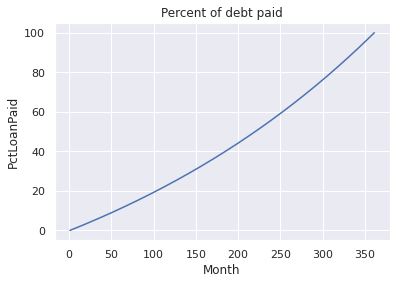

$3,500 monthly rental vs $750,000 purchase


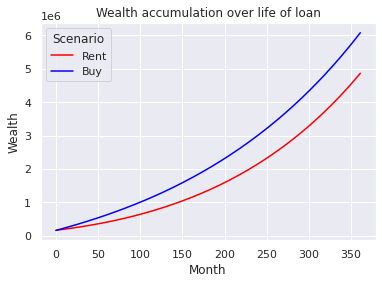

In [26]:
#Inputs
home_price = 750000  # buy only
down_pmt_pct = 20  # buy only
int_rate = 0.03
mortgage_yrs = 30
monthly_rent = 3500  # rent only (current rent = 2134)
initial_total_income = 125000
JointFile = False
monthly_hoa = 0  # buy only
prop_tax_rate = 0.0125
house_apprecation_rate = 0.05
stock_appreciation_rate = 0.05
home_repair_rate = 0.01
initial_home_asset = 0
initial_home_debt = 0
initial_savings = 150000
SAVE_CSV = True

# Define buy and rent DataFrames
income=simple_job_arr(initial_salary=initial_total_income, annual_raise=0.03, num_periods=mortgage_yrs*12)

buy_df = buy_home_df(income, home_price=home_price, down_pmt_pct=down_pmt_pct, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=0, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=monthly_hoa, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

rent_df = buy_home_df(income, home_price=0.01, down_pmt_pct=0, 
                 int_rate=int_rate, mortgage_yrs=mortgage_yrs, monthly_rent=monthly_rent, 
                 initial_total_income=initial_total_income, JointFile=JointFile, monthly_hoa=0, 
                 prop_tax_rate=prop_tax_rate, house_apprecation_rate=house_apprecation_rate, 
                 stock_appreciation_rate=stock_appreciation_rate, home_repair_rate=home_repair_rate, 
                 initial_home_asset=initial_home_asset, initial_home_debt=initial_home_debt, 
                 initial_savings=initial_savings)

buy_df = buy_df.assign(Scenario='Buy')
rent_df = rent_df.assign(Scenario='Rent')

# Create mortgage summary
down_pmt = down_pmt_pct / 100 * home_price
mortgage_summary(home_price, int_rate, mortgage_yrs, down_pmt)
print()

# Compare rent vs buy wealth                                          
compare_housing(rent_df, "Rent", buy_df, "Buy")

# Create debt figure
sb.set_theme()
f1 = sb.lineplot(data=buy_df.drop([0]), x='Month', y='PctLoanPaid', markers=True)
f1.set_title("Percent of debt paid")
plt.show()

# Create wealth comparison figure
rentbuy_df = pd.concat([rent_df, buy_df]).reset_index()
f2 = sb.lineplot(data=rentbuy_df, x='Month', y='Wealth', hue='Scenario', palette=['red', 'blue'])
f2.set_title("Wealth accumulation over life of loan")
print('${:,d}'.format(monthly_rent) + " monthly rental vs ${:,d}".format(home_price) + " purchase")
plt.show()

# Save DFs to csv
if SAVE_CSV:
    rent_df.to_csv(os.path.join(out_dir, '02', 'rent_df.csv'))
    buy_df.to_csv(os.path.join(out_dir, '02', 'buy_df.csv'))

In [17]:
rent_df

,d_Income,d_IncomeTax,d_HomeAsset,d_Debt,d_PropertyTax,d_PrinciplePmt,d_InterestPmt,d_HOA,d_Repairs,d_Rent,d_StockGains,d_Savings,d_Wealth,HomeAsset,HomeDebt,HomeEquity,PctLoanPaid,Savings,Wealth,Scenario
Month,,,,,,,,,,,,,,,,,,,,
0,10416.666667,3741.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0,0.000000,0,0.000000,6675.666667,6675.666667,0.000000,0.000000e+00,0.000000,100.000000,1.566757e+05,1.566757e+05,Rent
1,10416.666667,3741.000000,0.010000,0.010000,0.00000,0.000000,0.000000e+00,0,0.000000,0,0.000000,6675.666667,6675.666667,0.010000,1.000000e-02,0.000000,0.000000,1.633513e+05,1.633513e+05,Rent
2,10416.666667,3740.999990,0.000042,-0.000017,0.00001,0.000017,2.500000e-05,0,0.000008,3500,55.630556,3231.297171,3231.297230,0.010042,9.982840e-03,0.000059,0.171604,1.665826e+05,1.665826e+05,Rent
3,10416.666667,3740.999990,0.000042,-0.000017,0.00001,0.000017,2.495710e-05,0,0.000008,3500,69.094294,3244.760910,3244.760969,0.010083,9.965636e-03,0.000118,0.343637,1.698274e+05,1.698274e+05,Rent
4,10416.666667,3740.999990,0.000042,-0.000017,0.00001,0.000017,2.491409e-05,0,0.000008,3500,82.614131,3258.280747,3258.280806,0.010125,9.948390e-03,0.000177,0.516100,1.730857e+05,1.730857e+05,Rent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,24547.557354,10578.421707,0.000042,-0.000042,0.00001,0.000042,5.230754e-07,0,0.000008,3500,19028.927205,29498.062792,29498.062875,0.024833,1.675929e-04,0.024666,98.324071,4.746441e+06,4.746441e+06,Rent
358,24547.557354,10578.421707,0.000042,-0.000042,0.00001,0.000042,4.189821e-07,0,0.000008,3500,19151.835800,29620.971387,29620.971470,0.024875,1.258514e-04,0.024749,98.741486,4.776062e+06,4.776062e+06,Rent
359,24547.557354,10578.421707,0.000042,-0.000042,0.00001,0.000042,3.146286e-07,0,0.000008,3500,19275.256514,29744.392101,29744.392184,0.024917,8.400565e-05,0.024833,99.159943,4.805806e+06,4.805806e+06,Rent


In [18]:
buy_df

,d_Income,d_IncomeTax,d_HomeAsset,d_Debt,d_PropertyTax,d_PrinciplePmt,d_InterestPmt,d_HOA,d_Repairs,d_Rent,d_StockGains,d_Savings,d_Wealth,HomeAsset,HomeDebt,HomeEquity,PctLoanPaid,Savings,Wealth,Scenario
Month,,,,,,,,,,,,,,,,,,,,
0,10416.666667,3741.000000,0.0,0.000000,0.00,0.000000,0.000000,0,0.0,0,0.000000,6675.666667,6675.666667,0.0,0.000000e+00,0.000000e+00,100.000000,1.566757e+05,1.566757e+05,Buy
1,10416.666667,3741.000000,750000.0,600000.000000,0.00,0.000000,0.000000,0,0.0,0,0.000000,-143324.333333,6675.666667,750000.0,6.000000e+05,1.500000e+05,0.000000,1.335133e+04,1.633513e+05,Buy
2,10416.666667,3131.250000,3125.0,-1029.624202,781.25,1029.624202,1500.000000,0,625.0,0,-569.369444,2780.173020,6934.797222,753125.0,5.989704e+05,1.541546e+05,0.171604,1.613151e+04,1.702861e+05,Buy
3,10416.666667,3132.296356,3125.0,-1032.198263,781.25,1032.198263,1497.425939,0,625.0,0,-557.785390,2790.710718,6947.908981,756250.0,5.979382e+05,1.583118e+05,0.343637,1.892222e+04,1.772340e+05,Buy
4,10416.666667,3133.345327,3125.0,-1034.778759,781.25,1034.778759,1494.845444,0,625.0,0,-546.157429,2801.289708,6961.068467,759375.0,5.969034e+05,1.624716e+05,0.516100,2.172351e+04,1.841951e+05,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,24547.557354,10562.211599,3125.0,-2498.239676,781.25,2498.239676,31.384527,0,625.0,0,16350.590932,26400.062485,32023.302160,1862500.0,1.005557e+04,1.852444e+06,98.324071,4.100542e+06,5.952986e+06,Buy
358,24547.557354,10565.437451,3125.0,-2504.485275,781.25,2504.485275,25.138928,0,625.0,0,16460.591192,26506.836893,32136.322168,1865625.0,7.551086e+03,1.858074e+06,98.741486,4.127049e+06,5.985123e+06,Buy
359,24547.557354,10568.671367,3125.0,-2510.746488,781.25,2510.746488,18.877714,0,625.0,0,16571.036346,26614.048130,32249.794618,1868750.0,5.040339e+03,1.863710e+06,99.159943,4.153663e+06,6.017372e+06,Buy


In [22]:
out_dir

NameError: name 'out_dir' is not defined